In [3]:
using 
Statistics,
Distributions,
StatsPlots

ArgumentError: ArgumentError: Package StatsPlots not found in current path.
- Run `import Pkg; Pkg.add("StatsPlots")` to install the StatsPlots package.

## Measures of Central Tendency
Measures of central tendency are summary statistics, consisting of single values that attempt to describe the middle or centre of a distribution of numbers. 

### Mean
The mean, sometimes called the average, is a measure of central tendency derived through the sum of all numbers in the distribution, divided by the number of numbers. Specifically, this refers to the _arithmetic mean_. There are several other types of means, with different uses. However, colloquially, when talking about the mean or the average, most contexts refer to the arithmetic mean. 

The mathematical formula is the following:

$$
\bar{x} =  \dfrac{1}{n} \left( \sum_{i = 1}^{n} x_i \right)
$$

In this case, the symbol $\bar{x}$ refers to the sample mean, while the population mean is often denoted with $\mu$.

### Median
The median is another measure of central tendency, where the value is the number in the middle of the sequence of numbers. In other words, half of the distribution is below the median and the other half is above the median. If the distribution is even, meaning that there is no "middle" number, the median is the average of the two middlemost numbers. 

The mathematical formula is the following, with $X$ being an ordered list of values and $n$ the number of values in the list: 

$$
Med(X) = 
\begin{cases} 
X\left[\dfrac{n+1}{2}\right] \hspace{30mm} \textrm{if n is odd} \\
\dfrac{X\left[\dfrac{n}{2}\right] + X\left[\dfrac{n}{2}+1\right]}{2} \hspace{16mm} \textrm{if n is even}
\end{cases}
$$

### Mode
For ungrouped data, the mode is simply the value in the distribution of numbers that occurs most often. If two values occur equally often, and most often, the mode is two values. 

<br>

## Measures of Dispersion
Measures of dispersion are values that describe how far the values in a data set are from each other and from measures of centrality. 

### Range
The range is the difference between the largest and smallest number in the data set. This measure of dispersion is highly sensitive to outliers. Generally, it is better to just use the maximum and minimum of the values in the data set. 

### Interquartile Range
The interquartile range is the 75^th^ percentile of the data set minus the 25^th^ percentile. This measure of dispersion is a lot more robust than the range. 

To calculate the interquartile range, one can use the percentile formula: 

$$
P = 100(n/N)
$$

where $P$ is the percentile of a number in a data set, $n$ is the ordinal rank (what place the number comes in an ordered list of the numbers in the data set) and $N$ is the total number of numbers in the data set. 

In other words the interquartile range is the middle number in the numbers above the median, minus the middle number in the numbers below the median. 

### Variance
The variance is a measure of dispersion that calculates the average squared distance of each data point from the mean of the data set. The mathematical formula is the following: 
 
$$
\sigma^{2} = \dfrac{1}{N} \sum_{i = 1}^{N}(x_i - \mu)^2
$$

where $N$ is the size of the population and $\mu$ is the population mean. 

However, we often find ourselves in situations where we do not have access to the population parameters. Instead, we rely on a sample. When calculating the variance of a sample, the formula is the following:

$$
s^{2} = \dfrac{1}{n - 1} \sum_{i = 1}^{n}(x_i - \bar{x})
$$

where $n$ is the sample size and $\bar{x}$ is the sample mean. The use of $n-1$ is due to Bessel's correction, which is a way of ensuring the sample mean is an unbiased estimator of the population mean. 

### Standard Deviation
The standard deviation is the square root of the variance. 

### Coefficient of Variation

<br>

## The Law of Large Numbers (LLN)
The Law of Large numbers states that as the sample size increases, the probability that the sample mean is close to the population mean increases to 1 (certainty). 
Formally, the Law of Large numbers states that given a sample of independent (i.e. sampling with replacement, as sampling without replacement alters the probability of a specific value being chosen) and identically distributed (i.e. from the same distribution) values, the sample mean converges to the true mean. 

Here is a simulation of this in three different situations: 

1. **The flipping of a fair coin, for heads of tails (heads = 1, tails = 0)** 

The probability of each outcome is $P = 0.5$. The mean is $\dfrac{0.5 + 0.5}{2} = 0.5$

In [2]:
means = []
flips = []
for i in 1:10000
    flip_result = rand((0, 1), i)
    x̄ = mean(flip_result)
    push!(means, x̄)
    push!(flips, i)
end

plot(flips, means)

UndefVarError: UndefVarError: `plot` not defined

As predicted by the LLN, as the sample size increases, the mean converges to the true mean. 

2. **The rolling of a fair six-sided dice.**

The probability of each outcome is $P = 1/6$. The mean is $\dfrac{1 + 2 + 3 + 4 + 5 + 6}{6} = 3.5$. 


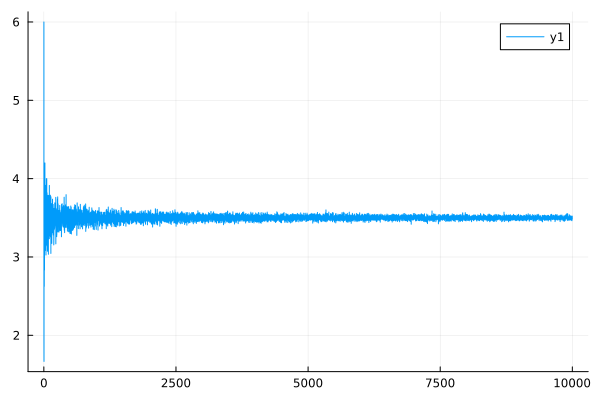

In [3]:
means = []
rolls = []
for i in 1:10000
    no_of_rolls = i
    roll_result = rand((1:6), i)
    x̄ = mean(roll_result)
    push!(means, x̄)
    push!(rolls, no_of_rolls)
end

plot(rolls, means)

Again, as the sample increases, the mean converges to the true mean. 

3. **The sampling of a normal distribution (mean: μ = 0, standard deviation: σ = 1)**

The mean is $\mu$, which is $0$. 

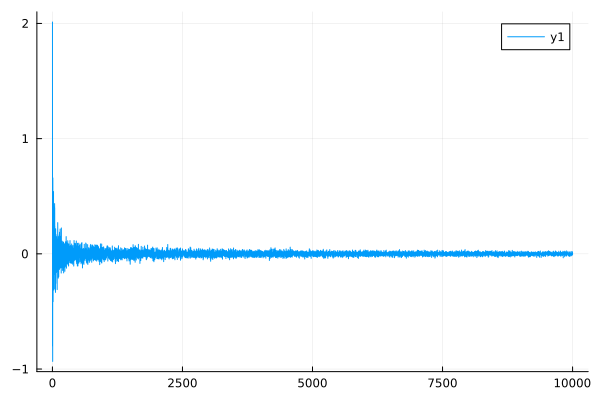

In [4]:
d_norm = Normal()
means = []
samples = []
for i in 1:10000
    sample_size = i
    sample = rand(d_norm, i)
    x̄ = mean(sample)
    push!(means, x̄)
    push!(samples, sample_size)
end

plot(samples, means)

## The Central Limit Theorem
The Central Limit Theorem states that the sample means of random, independent samples (i.e. sampling with replacement) drawn from an identical distribution will approximate a normal distribution as the number of samples are increased, even if the distribution from which the samples are taken is not normal.

Here is a simulation in three different situations: 

1. **Numerous samples taken from a Bernoulli distribution**

_Original distribution:_

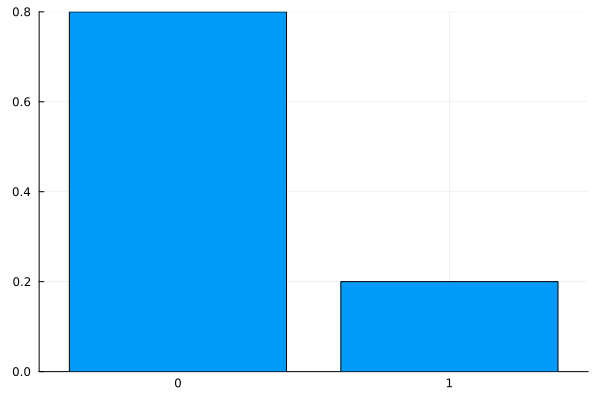

In [5]:
d_bernoulli = Bernoulli(0.2)

bar(d_bernoulli, xticks = 0:1:1, legend = false)

_Sampling distribution:_

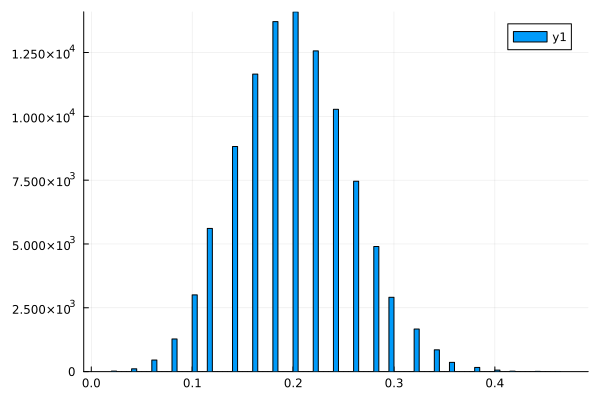

In [10]:
sample_means = []
sample_size = 50
for i in 1:100000
    sample = rand(d_bernoulli, sample_size)
    x̄ = mean(sample)
    push!(sample_means, x̄)
end

histogram(sample_means)

2. **Numerous samples taken from a Poisson distribution**

_Original distribution:_

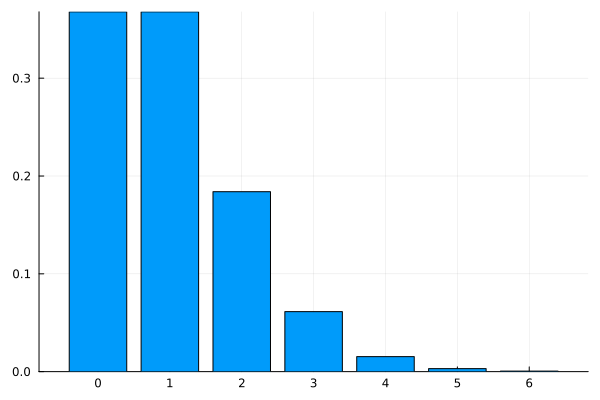

In [11]:
d_poisson= Poisson(1)

bar(d_poisson, legend = false)

_Sampling distribution:_

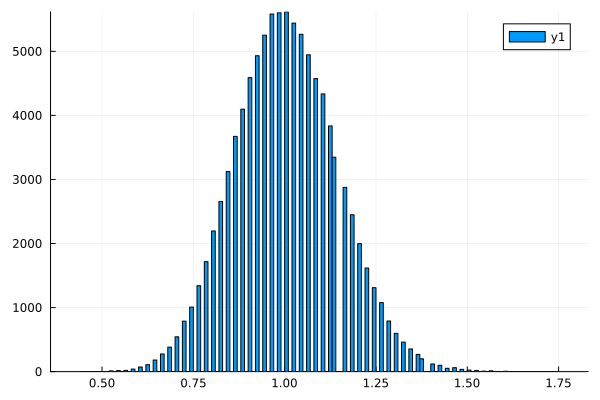

In [18]:
sample_means = []
sample_size = 50
for i in 1:100000
    sample = rand(d_poisson, sample_size)
    x̄ = mean(sample)
    push!(sample_means, x̄)
end

histogram(sample_means)

3. **Numerous samples taken from a exponential distribution**

_Original distribution:_

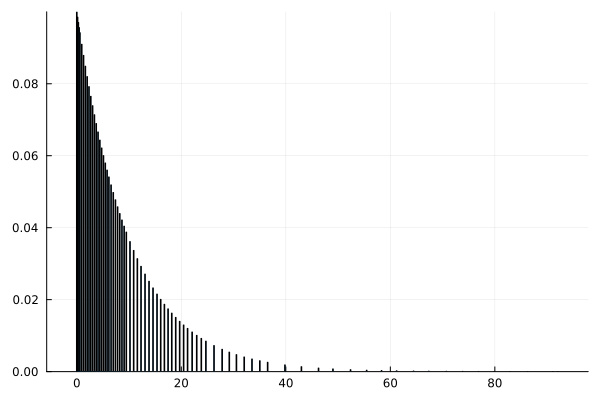

In [19]:
d_exponential= Exponential(10)

bar(d_exponential, legend = false)

_Sampling distribution:_

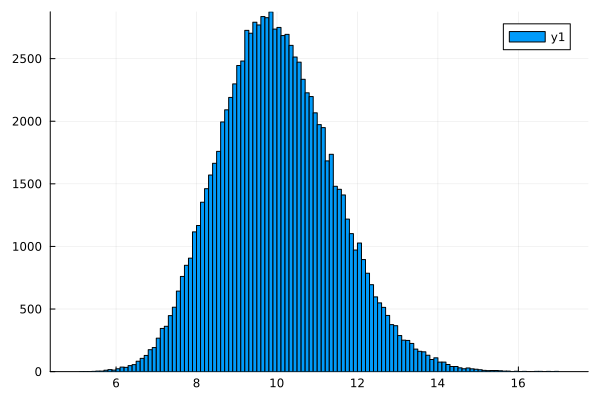

In [20]:
sample_means = []
sample_size = 50
for i in 1:100000
    sample = rand(d_exponential, sample_size)
    x̄ = mean(sample)
    push!(sample_means, x̄)
end

histogram(sample_means)

## The Variance of the Sample Mean
Our last piece of the statistical inference puzzle is the calculation of the standard error of the population mean, which is a measure of the dispersion of the sample means around the population mean. The standard error is the standard deviation of the sample means from the population mean. It has the following formula, where $\sigma_{\bar{x}}$ is the standard error, $\sigma$ is the population standard deviation and $n$ is the sample size:

$$
\sigma_{\bar{x}} = \dfrac{\sigma}{\sqrt{n}}
$$

The population standard deviation $\sigma$ is often unknown, but can be estimated by the standard deviation of a sample, which is often what is available ($\sigma_x$). In this case, the formula is: 

$$
\hat{\sigma_{\bar{x}}} ≈ \dfrac{\sigma_x}{\sqrt{n}}
$$

where a hat has been added to the $\sigma_{\bar{x}}$ to signify that it is an estimator. 

#### Derivation of the formula for the variance of the sample mean
How is the formula for the standard error derived? Let's start with the calculation of the sample mean. The sample mean $\bar{x}$ is the mean of a set of means of samples of independent random variables $x$ from the same distribution. In other words, it is the sum of means of samples of independent random variables, divided by the number of samples:

$$
\bar{x} = \dfrac{x_1 + x_2 + ... + x_n}{n} = \dfrac{1}{n} \sum_{i=1}^{n}x_i
$$ 

Let $S$ denote the sum of all the means of the samples $\sum_{i = 1}^n x_i$, giving:

$$
\bar{x} = \dfrac{S}{n}
$$

Now, for independent random variables (the means of samples are also random variables) from the same distribution, the variance of their sum is equal to the sum of their variances:

$$
Var(S) = Var(x_1) + Var(x_2) + ... + Var(x_n) = n\sigma^2
$$

where $\sigma^2$ denotes the variance. The reason for this simplification is that the random variables are identical (from the same distribution) and independent, which means that they all have the same variance. 

But ultimately we are not looking for the variance of $S$, we are looking for the variance of the sample mean $Var\left(\dfrac{S}{n}\right)$. 

The thing is, when we introduce a division, sometimes called scaling in statistical terms, the formula and calculation of the variance results in a squaring of the divisor. What follows is an example based on $S$ and $\dfrac{S}{n}$. 

The definition of the variance of $S$ is: 

$$
Var(S) = E[(S - E[S])^2]
$$

where $E[S]$ denotes the expected value of $S$, which is a generalisation of the weighted average of $S$.

Now consider the same definition for $\dfrac{S}{n}$:
$$
Var\left(\dfrac{S}{n}\right) = E\left[\left(\dfrac{S}{n} - E\left[\dfrac{S}{n}\right]\right)^2\right]
$$

With $E\left[\dfrac{S}{n}\right] = \dfrac{E[S]}{n}$, the equation becomes: 
$$
Var\left(\dfrac{S}{n}\right) = E\left[\left(\dfrac{S}{n} - \dfrac{E[S]}{n}\right)^2\right]
$$

We can simplify this to: 
$$
Var\left(\dfrac{S}{n}\right) = \dfrac{1}{n^2} E[(X - E[X])^2]
$$

$E[(X - E[X])^2] = Var(S)$, so: 

$$
Var\left(\dfrac{S}{n}\right) = \dfrac{Var(S)}{n^2}
$$

This proves that by taking the average of the means of the samples, i.e. dividing the means by $n$, the variance of those means is scaled by the square of the divisor. 

#### The final steps to the formula for the variance of the sample mean

We know that $Var(S) = n\sigma^2$ and that $Var\left(\dfrac{S}{n}\right) = Var(\bar{x}) = \sigma_{\bar{x}}^2$. 

If we put all of this together, we get: 

$$
\sigma_{\bar{x}^2} = \dfrac{n\sigma^2}{n^2}
$$

Simplifying this, we get: 

$$
\sigma_{\bar{x}^2} = \dfrac{\sigma^2}{n}
$$

The final step, which is taking the square root of the expression to arrive at the standard error (the standard deviation of the sample mean from the population mean), gives us: 

$$
\sigma_{\bar{x}} = \sqrt{\dfrac{\sigma}{n}} = \dfrac{\sigma}{\sqrt{n}}
$$

## Putting it all together: The Law of Large Numbers and the Central Limit Theorem give us superpowers
So, how does the Law of Large Numbers and the Central Limit Theorem enable the superpowers of statistical inference?

1. The Law of Large numbers tells us that repeated, independent sample means from an identical distribution will converge to the true mean (the population mean).

2. The Central Limit Theorem tells us that repeated, independent sample means from an identical distribution will be approximately normally distributed.

3. The standard error tells us about the dispersion of the sample means around the population mean. 

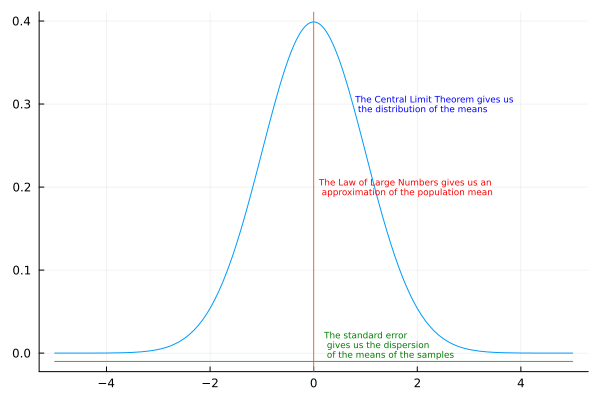

In [21]:
f(x) = (1/sqrt(2π))exp(-(1/2)x^2)
plot(f, legend = false)
plot!([0], seriestype="vline", label="")
plot!([-5, 5], [-0.01, -0.01])
annotate!(0.1, 0.2, ("The Law of Large Numbers gives us an \n approximation of the population mean", 6, :red, :left))
annotate!(0.8, 0.3, ("The Central Limit Theorem gives us \n the distribution of the means", 6, :blue, :left))
annotate!(0.2, 0.01, ("The standard error \n gives us the dispersion \n of the means of the samples", 6, :green, :left))

Knowing these three things enables us to understand the mean of a single sample as located somewhere on a normal distribution, where the population mean is the center of the distribution and the standard error is the dispersion around the centre. Due to the characteristics of the normal distribution, we know that 68% of all sample means fall within one standard deviation of the population mean, 95% fall within 1.96 standard deviations, and 99.7% fall within 2.58 standard deviations. 

### Confidence Intervals
A confidence interval gives us the interval in which we can have a chosen percentage of confidence ($\alpha$) that, if we repeated our sampling numerous times, the true population mean would be included in the chosen percentage of samples. 

When interpreting a single confidence interval in practice, we can think of it as a reasonable betting proposition. While we cannot say there's a 95% probability that the true population parameter falls within our specific interval (since the parameter is fixed, not random), we can approach it from another angle: If we were to draw many samples from the same population and construct confidence intervals for each, approximately 95% of these intervals would contain the true parameter. Therefore, without knowing whether our particular sample is representative or unusual, it's rational to act as if our interval contains the true value—it's simply playing the odds wisely. This perspective transforms confidence intervals from abstract statistical constructs into practical decision-making tools, allowing us to quantify and communicate uncertainty in our estimates while making informed choices based on limited data.

